## Goal:
### Explore Diamonds dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

# Dataset: Diamonds

### 1. Why This Project?
 
##### 1.Learn data cleaning with Pandas.
 
##### 2.Use NumPy for calculations (mean, median, etc.).
 
##### 3.Visualize trends using Matplotlib and Seaborn.
 
##### 4.Understand the relationship between different columns in dataset.

### 2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset


In [3]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 4. Explore Data
 

In [4]:
print("Shape:", df_diamonds.shape)
print(df_diamonds.info())
print(df_diamonds.isnull().sum())
print(df_diamonds.describe())

Shape: (53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405  

### Insights:
 
1. This is a large dataset with 53,940 records.
 
2. There are no missing values.
 
3. The features x, y, and z have minimum values of 0, which is physically impossible for a diamond's dimensions and may represent data errors. However, for this analysis, we will proceed without cleaning them.

### 5. Analysis with NumPy & Pandas

In [5]:
# Average price
avg_price = np.mean(df_diamonds['price'])
print("Average Price:", avg_price)

# Average price by cut
avg_price_by_cut = df_diamonds.groupby('cut')['price'].mean()
print("Average Price by Cut:\n", avg_price_by_cut)

# Average price by color
avg_price_by_color = df_diamonds.groupby('color')['price'].mean()
print("Average Price by Color:\n", avg_price_by_color)

Average Price: 3932.799721913237
Average Price by Cut:
 cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64
Average Price by Color:
 color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


C:\Users\yashw\AppData\Local\Temp\ipykernel_18768\2944076696.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_cut = df_diamonds.groupby('cut')['price'].mean()
C:\Users\yashw\AppData\Local\Temp\ipykernel_18768\2944076696.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_color = df_diamonds.groupby('color')['price'].mean()


### Insights:

1.  The average price of a diamond in the dataset is approximately $3933.
 
2. Contrary to intuition, "Premium" and "Fair" cuts have higher average prices than "Ideal" cuts, likely because price is heavily influenced by carat, which might be larger in these cut categories.
 
3. Price increases as the color grade worsens (from D to J), which is also counter-intuitive and likely influenced by other factors like carat size.

### 6. Visualization with Matplotlib & Seaborn

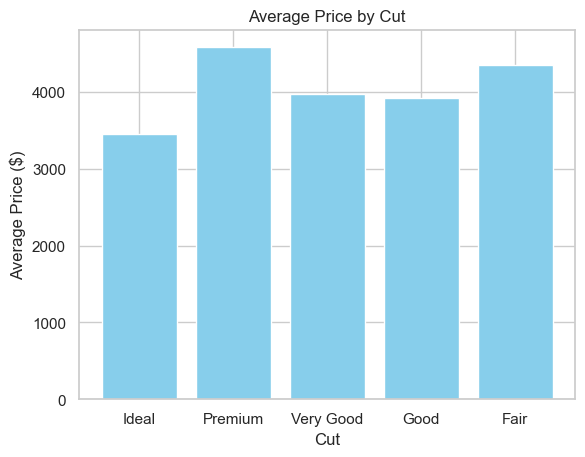

In [6]:
# Bar plot of average price by cut
cut_cat = avg_price_by_cut.index
price_val = avg_price_by_cut.values

plt.bar(cut_cat, price_val, color='skyblue')
plt.title("Average Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Average Price ($)")
plt.show()

### Insights:

1. This visual confirms that Premium cut diamonds have the highest average price, while Ideal cut diamonds have the lowest. This highlights that cut is not the only driver of price.

C:\Users\yashw\AppData\Local\Temp\ipykernel_18768\2753354344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cut', data=df_diamonds, palette='viridis')


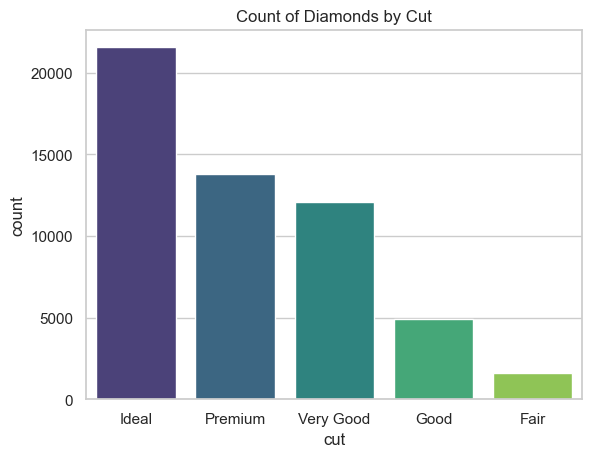

In [7]:
# Countplot of Cut
sns.countplot(x='cut', data=df_diamonds, palette='viridis')
plt.title("Count of Diamonds by Cut")
plt.show()

### Insights:

1. The most common cut in the dataset is Ideal, followed by Premium and Very Good.

2. Fair is the least common cut.